In [7]:
import numpy as np

from sklearn.decomposition import PCA, FastICA
from RICA import Optimizer
from RICA import ContrastCalculator

rng = np.random.RandomState(42)
n = 20000  # Number of samples
d = 2    # Number of features
MC_SAL_LEN = 2  
# S = rng.standard_t(2, size=(n, d))
S = rng.standard_t(0.8, size=(n, d))
S[:, 0] *= 2.
print("S shape ", S.shape)
# compute delta
contrast_calculator = ContrastCalculator(n,d,MC_SAL_LEN)
delta = contrast_calculator.compute_delta(S)
print("delta = ", delta)
# Mix data
A = np.array([[1, 1], 
              [0, 1]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations

rica_optimizer = Optimizer(n,d,MC_SAL_LEN, verbose=False)
I_x = rica_optimizer.RICA(X)


print("I_x @ A = \n", I_x @ A)
S_rica = np.dot(X, I_x.T)

pca = PCA()
S_pca_ = pca.fit(X).transform(X)

ica = FastICA(n_components=2)
I_fast_ica = ica.fit(X).mixing_
print("I_fast_ica @ A = \n", I_fast_ica @ A)
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources

S shape  (20000, 2)
delta =  0.02210288922563476
Iter 0: offdiag=5.72e+02, col_norms=[1. 1.]
 condition number of theta_hat:  1.0000107895617758
 norms of rows of theta_hat:  [1. 1.]
I_x @ A = 
 [[ 6.74e-09 -2.42e-04]
 [-1.10e-03  6.63e-08]]
I_fast_ica @ A = 
 [[-3253.52  4566.76]
 [-4746.36  2027.18]]


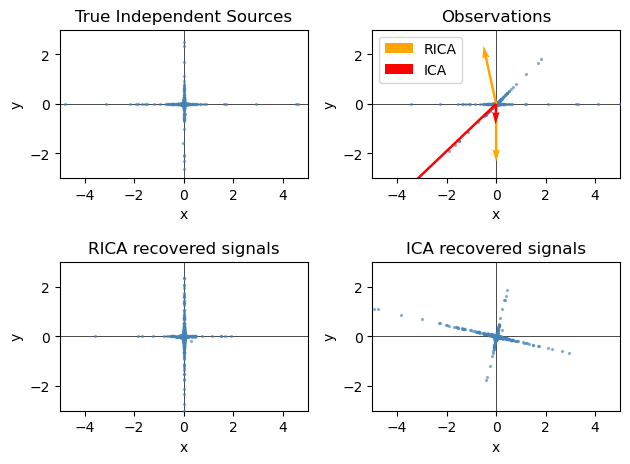

In [8]:
import matplotlib.pyplot as plt


def plot_samples(S, axis_list=None):
    plt.scatter(
        S[:, 0], S[:, 1], s=2, marker="o", zorder=10, color="steelblue", alpha=0.5
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            x_axis, y_axis = axis / axis.std()
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    plt.hlines(0, -5, 5, color="black", linewidth=0.5)
    plt.vlines(0, -3, 3, color="black", linewidth=0.5)
    plt.xlim(-5, 5)
    plt.ylim(-3, 3)
    plt.gca().set_aspect("equal")
    plt.xlabel("x")
    plt.ylabel("y")


plt.figure()
plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title("True Independent Sources")

axis_list = [(I_x, "orange", "RICA"), (ica.mixing_, "red", "ICA")]
plt.subplot(2, 2, 2)
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("Observations")

plt.subplot(2, 2, 3)
plot_samples(S_rica / np.std(S_rica))
plt.title("RICA recovered signals")

plt.subplot(2, 2, 4)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title("ICA recovered signals")

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
plt.tight_layout()
plt.show()

In [9]:
import numpy as np

from sklearn.decomposition import PCA, FastICA
from RICA import Optimizer
from RICA import ContrastCalculator

rng = np.random.RandomState(42)
n = 20000  # Number of samples
d = 2    # Number of features
MC_SAL_LEN = 2  
# S = rng.standard_t(2, size=(n, d))
S = rng.standard_t(2, size=(n, d))
S[:, 0] *= 2.
print("S shape ", S.shape)
# compute delta
contrast_calculator = ContrastCalculator(n,d,MC_SAL_LEN)
delta = contrast_calculator.compute_delta(S)
print("delta = ", delta)
# Mix data
A = np.array([[1, 1], 
              [0, 1]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations

rica_optimizer = Optimizer(n,d,MC_SAL_LEN, verbose=False)
I_x = rica_optimizer.RICA(X)


print("I_x @ A = \n", I_x @ A)
S_rica = np.dot(X, I_x.T)

pca = PCA()
S_pca_ = pca.fit(X).transform(X)

ica = FastICA(n_components=2)
I_fast_ica = ica.fit(X).mixing_
print("I_fast_ica @ A = \n", I_fast_ica @ A)
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources

S shape  (20000, 2)
delta =  0.17377861748667248
Iter 0: offdiag=1.84e-01, col_norms=[1. 1.]
 condition number of theta_hat:  1.0131875848107819
 norms of rows of theta_hat:  [1. 1.]
I_x @ A = 
 [[-0.32 -0.  ]
 [ 0.01  0.49]]
I_fast_ica @ A = 
 [[ 6.18  2.12]
 [-0.02 -4.08]]


/Users/jaybu/Desktop/rough_eth/rough_eth/cleanest_codes_yet/RICA.py:591: UserWarning: FlexJD failed: off-diag=5.62e-04, row norms of theta_hat=[1. 1.]
  warnings.warn(


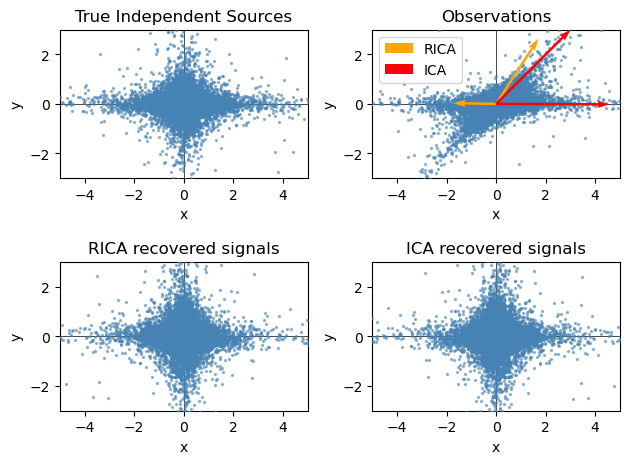

In [10]:
import matplotlib.pyplot as plt


def plot_samples(S, axis_list=None):
    plt.scatter(
        S[:, 0], S[:, 1], s=2, marker="o", zorder=10, color="steelblue", alpha=0.5
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            x_axis, y_axis = axis / axis.std()
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    plt.hlines(0, -5, 5, color="black", linewidth=0.5)
    plt.vlines(0, -3, 3, color="black", linewidth=0.5)
    plt.xlim(-5, 5)
    plt.ylim(-3, 3)
    plt.gca().set_aspect("equal")
    plt.xlabel("x")
    plt.ylabel("y")


plt.figure()
plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title("True Independent Sources")

axis_list = [(I_x, "orange", "RICA"), (ica.mixing_, "red", "ICA")]
plt.subplot(2, 2, 2)
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("Observations")

plt.subplot(2, 2, 3)
plot_samples(S_rica / np.std(S_rica))
plt.title("RICA recovered signals")

plt.subplot(2, 2, 4)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title("ICA recovered signals")

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
plt.tight_layout()
plt.show()